# Pymaceuticals Inc.
---

### Analysis

- From the data collected, there does appear to be a strong correlation (correlation of 0.84) between the weight of the mice and the average volume of the tumor they each had, where heavier mice displayed a larger tumor size. Based on that, I would recommend that the mice maintain healthy living conditions in order to yield the smallest tumor sizes.

- The drug regimen Capomulin does appear to be an effective drug for treating cancer within the mice. That can be seen in the tumor volume for mouse l509 where the tumor size on the mouse decreased by a fair amount over the testing period. 

- The results for Capomulin, Ramicane, Infubinol, and Ceftamin have shown to be fairly consistent based on the data collected. This can be seen in the box plots for each drug regimen where only one outlier was collected among the 4 drug regimens.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(study_results, mouse_metadata, on = ['Mouse ID'])
# Re-organize the data
mouse_data_df = mouse_data_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen',
                               'Sex', 'Age_months', 'Weight (g)']]

# Remove duplicate Mouse IDs
no_dup_mouse_data_df = mouse_data_df.drop_duplicates(['Mouse ID'])
no_dup_mouse_data_df = no_dup_mouse_data_df.reset_index()
# Display the data table for preview
no_dup_mouse_data_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,10,f932,0,45.0,0,Ketapril,Male,15,29
2,11,g107,0,45.0,0,Ketapril,Female,2,29
3,19,a457,0,45.0,0,Ketapril,Female,11,30
4,22,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
no_dup_mouse_data_df['Mouse ID'].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id_df = mouse_data_df.loc[mouse_data_df['Mouse ID'] == 'g989']
dup_mouse_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_df = mouse_data_df[mouse_data_df['Mouse ID'] != 'g989']
cleaned_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Remove duplicate Mouse IDs
cleaned_no_dup_mouse_data_df = cleaned_mouse_data_df.drop_duplicates(['Mouse ID'])
# Checking the number of mice in the clean DataFrame.
cleaned_no_dup_mouse_data_df['Mouse ID'].count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = cleaned_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med = cleaned_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = cleaned_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = cleaned_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': med, 'Tumor Volume Variance': var,
                           'Tumor Volume Std. Dev.': std, 'Tumor Volume Std. Err.': sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

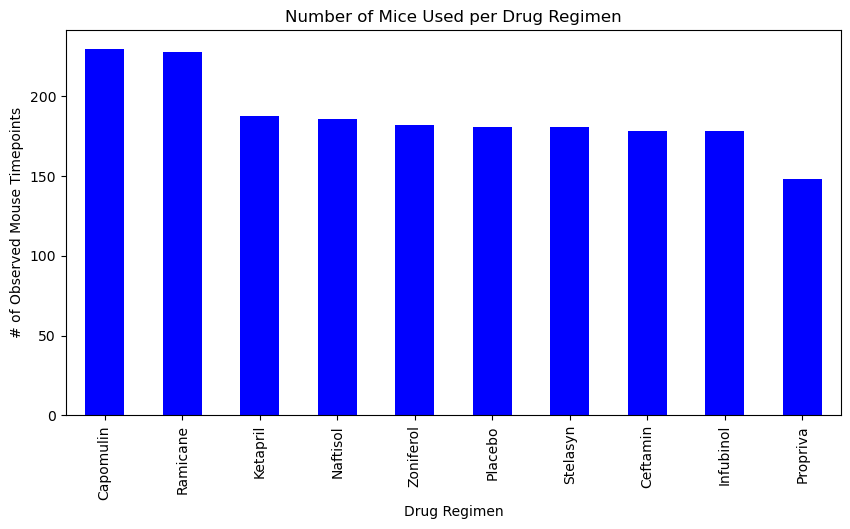

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create variable for data that will be used in bar chart and sort in descending order
dr_data = cleaned_mouse_data_df.groupby(['Drug Regimen']).count()
bar_data = dr_data['Timepoint']
bar_data = bar_data.sort_values(ascending = False)
#Generate bar plot
bar_data.plot(kind = 'bar', figsize = (10,5), color = 'blue', align = 'center')
# Set title and axis labels
plt.title("Number of Mice Used per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
# Display chart
plt.show()
plt.tight_layout()

<Figure size 1000x500 with 0 Axes>

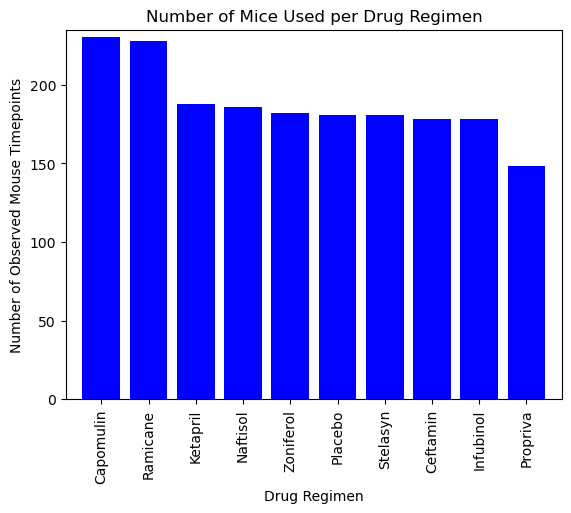

<Figure size 1000x500 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set x-axis and tick locations
x_axis = np.arange(len(bar_data))
tick_loc = [value for value in x_axis]

# Set title and axis labels
plt.title("Number of Mice Used per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(bar_data)+5)

# Generate bar chart
plt.bar(x_axis, bar_data, color = 'b', align = 'center')
plt.xticks(tick_loc, bar_data.index.values, rotation = 'vertical')
plt.figure(figsize = (10,5))


Text(0.5, 1.0, 'Sex Distribution of Mice Used')

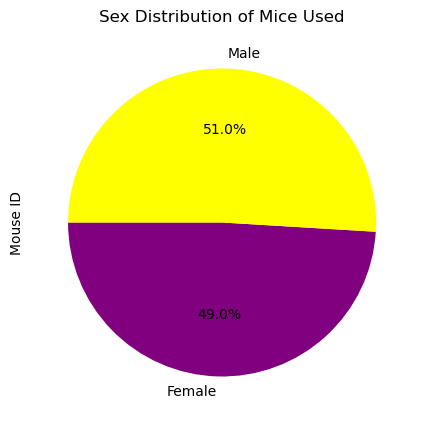

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create variable for data that will be used in pie chart
sex_data = cleaned_mouse_data_df.groupby(['Sex']).count()
pie_data = sex_data['Mouse ID']
colors = ['purple', 'yellow']

# Generate pie chart
pie_plot = pie_data.plot.pie(colors = colors, figsize = (5,5), startangle = 180, autopct = "%1.1f%%")
plt.title('Sex Distribution of Mice Used')

Text(0.5, 1.0, 'Sex Distribution of Mice Used')

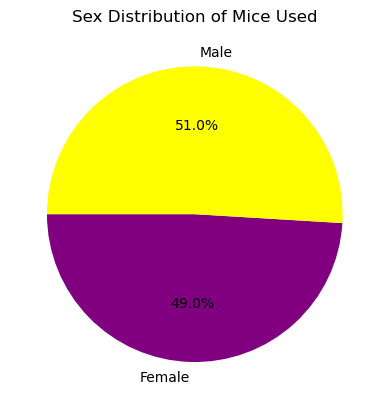

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data, labels = pie_data.index.values, colors = colors, autopct = "%1.1f%%", startangle = 180)
plt.rcParams['figure.figsize'] = (5,5)
plt.title('Sex Distribution of Mice Used')

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(cleaned_mouse_data_df.groupby('Mouse ID')['Timepoint'].max())
last_timepoint_df = last_timepoint_df.rename(columns = {'Timepoint': 'Last Timepoint'})
last_timepoint_df = last_timepoint_df.reset_index()
last_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, cleaned_mouse_data_df, on = ['Mouse ID'])
merged_df

,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
1875,z969,45,25,63.145652,2,Naftisol,Male,9,30
1876,z969,45,30,65.841013,3,Naftisol,Male,9,30
1877,z969,45,35,69.176246,4,Naftisol,Male,9,30
1878,z969,45,40,70.314904,4,Naftisol,Male,9,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    treatment_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]

    # add subset
    final_treatment_df = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['Last Timepoint']]
    
    # Create a variable for Tumor Volume (mm3)
    volume_vals = final_treatment_df['Tumor Volume (mm3)']
    tumor_vol_data.append(volume_vals)
    
    # Calculate quartiles and IQR for each Drug Regimen
    quartiles = volume_vals.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median = quartiles[0.5]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = (volume_vals.loc[(final_treatment_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_treatment_df['Tumor Volume (mm3)'] <= lower_bound)])
    
    print(f'{treatment} potential outliers: {outliers}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 275    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


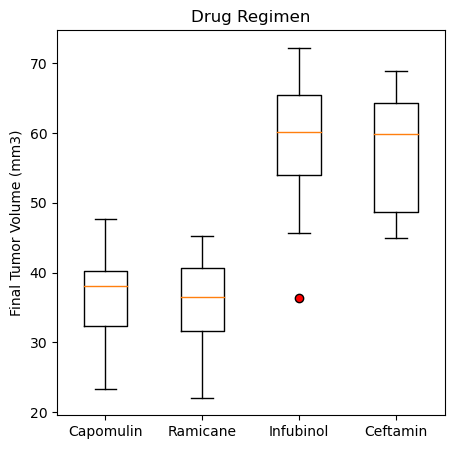

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Set flierprops
flierprops = dict(marker='o', markerfacecolor='r', markeredgecolor='black')

# Generate Box Plot
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops = flierprops)

#Set axis labels and xticks
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], treatments)

#Display chart
plt.show()

## Line and Scatter Plots

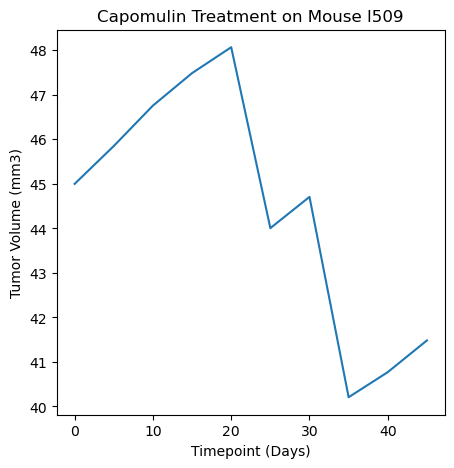

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create dataframe for mouse l509
mouse_df= cleaned_mouse_data_df.loc[cleaned_mouse_data_df['Mouse ID'] == 'l509']

# Set variables for x and y values
x_values = mouse_df['Timepoint']
y_values = mouse_df['Tumor Volume (mm3)']

# Generate line plot
plt.plot(x_values, y_values)

# Set title and axis labels
plt.title('Capomulin Treatment on Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

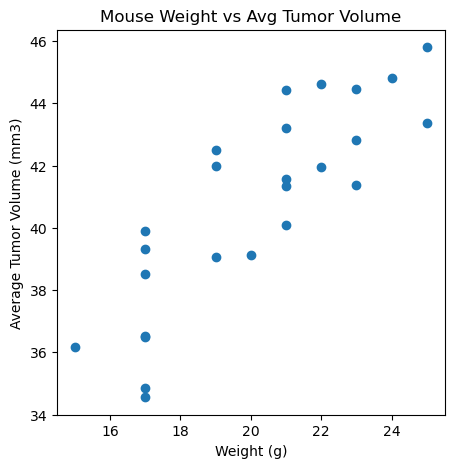

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Pull only data for Capomulin regimen
capomulin_df = cleaned_mouse_data_df.loc[cleaned_mouse_data_df['Drug Regimen'] == 'Capomulin']

# find average volume from capomulin_df
avg_cap_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
avg_cap_vol_df = avg_cap_vol_df.rename(columns = {'Tumor Volume (mm3)': 'Avg Tumor Volume'})

# merge the 2 dataframes on Mouse ID
final_avg_cap_vol_df = pd.merge(capomulin_df, avg_cap_vol_df, on='Mouse ID')

# remove duplicate Mouse IDs
scatter_data_df = final_avg_cap_vol_df.drop_duplicates(['Mouse ID'])

# Set Variales for x and y values
x_vals = scatter_data_df['Weight (g)']
y_vals = scatter_data_df['Avg Tumor Volume']

# Generate Scatter Plot
plt.scatter(x_vals, y_vals)

# Set title and axis labels
plt.title('Mouse Weight vs Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


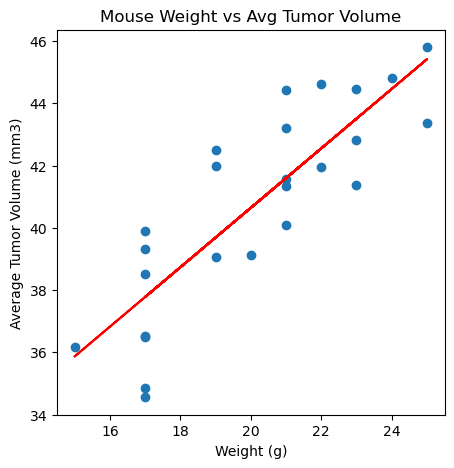

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Recreate scatter plot
plt.scatter(x_vals, y_vals)
plt.title('Mouse Weight vs Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the correlation
correlation = st.pearsonr(x_vals,y_vals)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot linear regression
plt.plot(x_vals,regress_vals,"r-")
plt.show()